In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


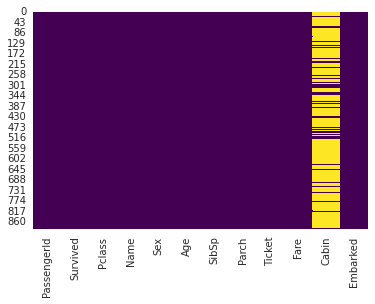

In [61]:
sns.heatmap(train.isnull(),
            cbar=False,
            cmap='viridis')

In [ ]:
sns.set_style('whitegrid')

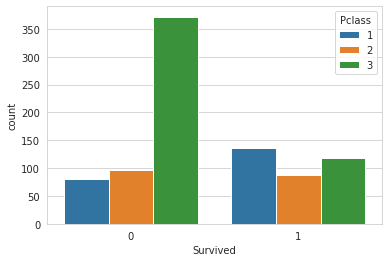

In [ ]:
sns.countplot(x='Survived',data=train,hue='Pclas s')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


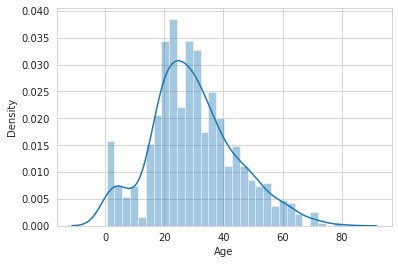

In [ ]:
sns.distplot(train['Age'].dropna(),bins=30)

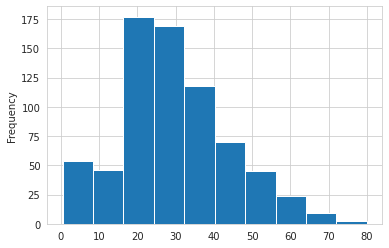

In [ ]:
train['Age'].plot.hist()

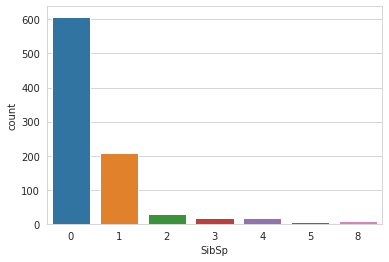

In [ ]:
sns.countplot(x='SibSp',data=train)

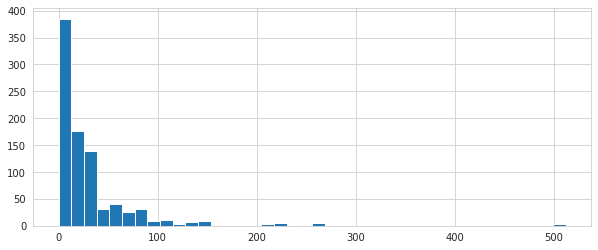

In [ ]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [25]:
import cufflinks as cf
import plotly.io as pio

In [26]:
cf.go_offline()
pio.renderers.default = "colab"

In [27]:
train['Fare'].iplot(kind='hist')

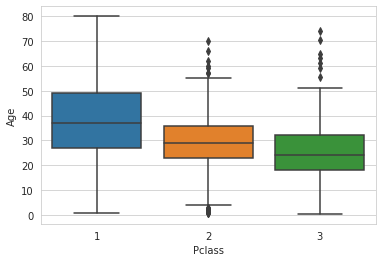

In [30]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [32]:
def impute(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [59]:
train['Age']=train[['Age','Pclass']].apply(impute,axis=1)

In [60]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [62]:
train.drop('Cabin',axis=1,inplace=True)


In [63]:
train.dropna(inplace=True)

In [64]:
train['Sex']=train['Sex'].apply(lambda x:1 if x=='male' else 0)

In [69]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train=pd.concat([train,embark],axis=1)

In [71]:
train.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [73]:
train.drop('PassengerId',axis=1,inplace=True)

In [74]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [77]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [76]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.linear_model import LogisticRegression

In [90]:
logmodel=LogisticRegression(max_iter=1000)

In [91]:
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [92]:
predictions=logmodel.predict(x_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [101]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]])

In [104]:
df=pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [105]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


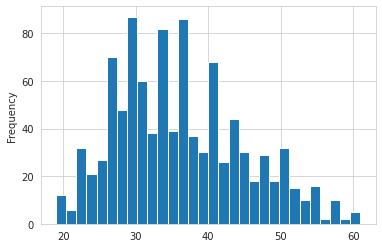

In [109]:
df['Age'].plot(kind='hist',bins=30)

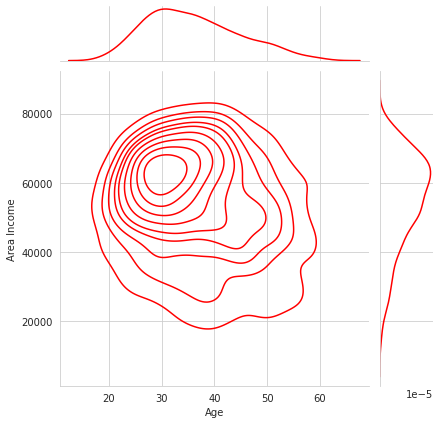

In [113]:
sns.jointplot(x='Age',y='Area Income',data=df,kind='kde',color='red')

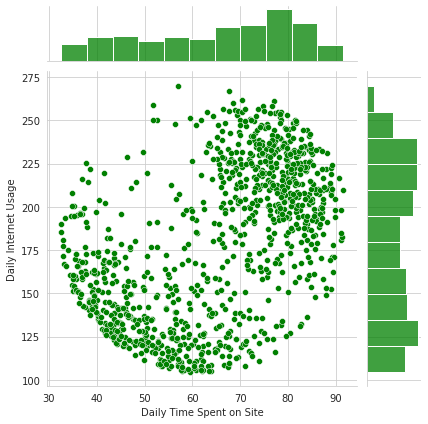

In [115]:
sns.jointplot(x='Daily Time Spent on Site',
              y='Daily Internet Usage',
              data=df,
              color='green')

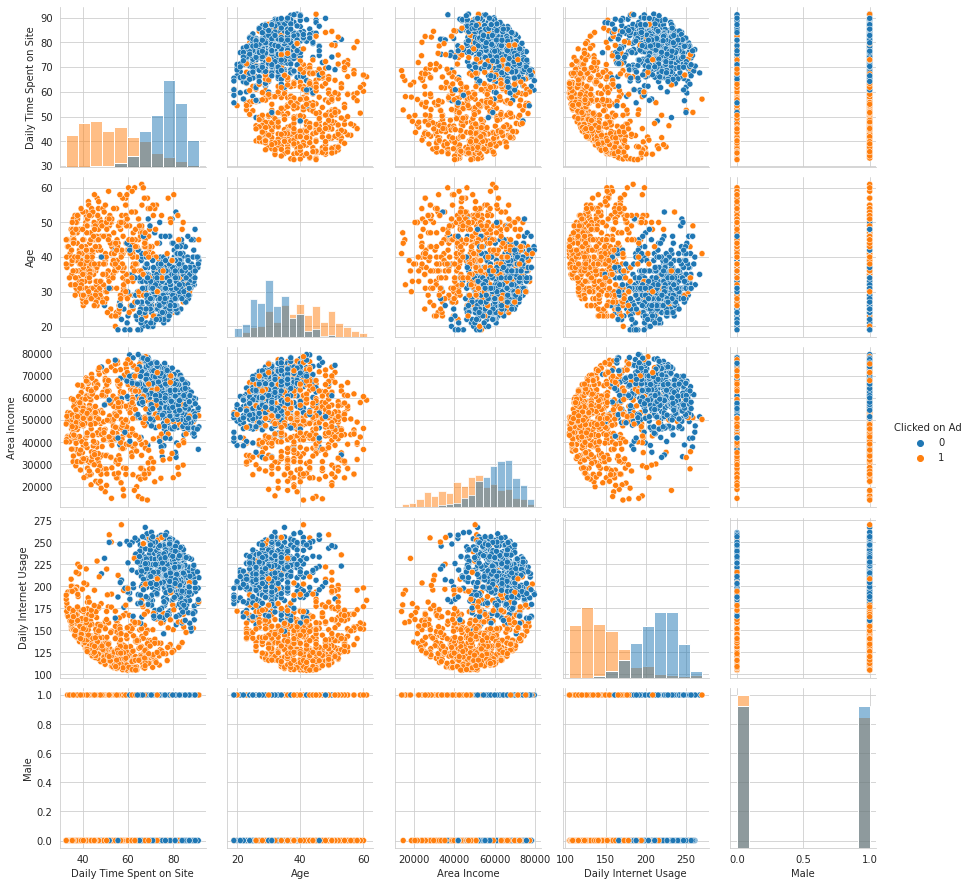

In [117]:
sns.pairplot(hue='Clicked on Ad',data=df, diag_kind="hist")

In [118]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [119]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [120]:
x=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
y=df['Clicked on Ad']

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [123]:
logistModel=LogisticRegression(max_iter=1000)

In [127]:
logistModel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [128]:
predictions=logistModel.predict(x_test)

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [132]:
confusion_matrix(y_test,predictions)

array([[156,   6],
       [ 25, 143]])